# 1
-----

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import RobustScaler
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [2]:
wine = load_wine()

In [3]:
test = np.genfromtxt("zip.test.gz", delimiter=" ")
test.shape

(2007, 257)

In [4]:
# Get the first 9 values of each line and label those as the values
zipTestIDLabels = np.genfromtxt("zip.test.gz", delimiter=" ",usecols=0, dtype='float')

In [5]:
# Get the last value from each line and desginate it as the label of each value
zipTestGrayScaleValues = np.genfromtxt("zip.test.gz", delimiter=" ", usecols=np.arange(1,257), dtype='float')

In [6]:
print(zipTestIDLabels)

[9. 6. 3. ... 4. 0. 1.]


In [7]:
print(zipTestGrayScaleValues)

[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]


In [8]:
train = np.genfromtxt("zip.train.gz", delimiter=" ")
train.shape

(7291, 257)

In [9]:
zipTrainIDLabels = np.genfromtxt("zip.train.gz", delimiter=" ",usecols=0, dtype='float')

In [10]:
zipTrainGrayScaleValues = np.genfromtxt("zip.train.gz", delimiter=" ", usecols=np.arange(1,257), dtype='float')

In [11]:
print(zipTrainIDLabels)

[6. 5. 4. ... 3. 0. 1.]


In [12]:
print(zipTrainGrayScaleValues)

[[-1.    -1.    -1.    ... -1.    -1.    -1.   ]
 [-1.    -1.    -1.    ... -0.671 -0.828 -1.   ]
 [-1.    -1.    -1.    ... -1.    -1.    -1.   ]
 ...
 [-1.    -1.    -1.    ... -1.    -1.    -1.   ]
 [-1.    -1.    -1.    ... -1.    -1.    -1.   ]
 [-1.    -1.    -1.    ... -1.    -1.    -1.   ]]


In [13]:
totalLabels = np.concatenate((zipTestIDLabels,zipTrainIDLabels), axis =0)

In [14]:
totalValues = np.concatenate((zipTestGrayScaleValues,zipTrainGrayScaleValues), axis =0)

In [15]:
print(totalLabels)

[9. 6. 3. ... 3. 0. 1.]


In [16]:
print(totalValues)

[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]


In [17]:
print(totalLabels.shape)

(9298,)


In [18]:
print(totalValues.shape)

(9298, 256)


# 2
------

In [19]:
uspsX_train, uspsX_test, uspsY_train, uspsY_test = train_test_split(totalValues, totalLabels, random_state=2309)

In [20]:
print(uspsX_train.shape,uspsX_test.shape)

(6973, 256) (2325, 256)


In [21]:
print(uspsY_train.shape,uspsY_test.shape)

(6973,) (2325,)


In [22]:
wineX_train, wineX_test, wineY_train, wineY_test = train_test_split(wine['data'], wine['target'], random_state=2309)

In [23]:
print(wineX_train.shape,wineX_test.shape)

(133, 13) (45, 13)


# 3
-----

In [24]:
svm_model = SVC()

uspsTrainScore = cross_val_score(svm_model,uspsX_train,uspsY_train)

In [25]:
wineTrainScore = cross_val_score(svm_model,wineX_train,wineY_train)

In [26]:
print("Cross Validation Scores for USPS: ", uspsTrainScore)

Cross Validation Scores for USPS:  [0.97204301 0.9655914  0.97275986 0.96126255 0.97776184]


In [27]:
print("Average Cross Validation Score for USPS: ", uspsTrainScore.mean())

Average Cross Validation Score for USPS:  0.9698837310953754


In [28]:
print("Cross Validation Score for Wine: ", wineTrainScore)

Cross Validation Score for Wine:  [0.7037037  0.7037037  0.62962963 0.76923077 0.73076923]


In [29]:
print("Average Cross Validation Score for Wine: ", wineTrainScore.mean())

Average Cross Validation Score for Wine:  0.7074074074074075


# 4
-----

In [30]:
svm_model.fit(uspsX_train, uspsY_train)

test_accuracy = svm_model.score(uspsX_train, uspsY_train)
test_error_rate = 1 - test_accuracy

print("Test Error Rate of USPS on Training Set:", test_error_rate)

Test Error Rate of USPS on Training Set: 0.00989531048329273


In [31]:
svm_model.fit(wineX_train, wineY_train)

test_accuracy = svm_model.score(wineX_train, wineY_train)
test_error_rate = 1 - test_accuracy

print("Test Error Rate of Wine on Training Set:", test_error_rate)

Test Error Rate of Wine on Training Set: 0.3007518796992481


In [32]:
svm_model.fit(uspsX_train, uspsY_train)

test_accuracy = svm_model.score(uspsX_test, uspsY_test)
test_error_rate = 1 - test_accuracy

print("Test Error Rate of USPS on Test Set:", test_error_rate)

Test Error Rate of USPS on Test Set: 0.023655913978494647


In [33]:
svm_model.fit(wineX_train, wineY_train)

test_accuracy = svm_model.score(wineX_test, wineY_test)
test_error_rate = 1 - test_accuracy

print("Test Error Rate of Wine on Test Set:", test_error_rate)

Test Error Rate of Wine on Test Set: 0.4


# 5 & 6
-----

    For the USPS Dataset

In [34]:
param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100],
'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [35]:
def makePrediction(scaler, X_train, y_train, X_test, y_test):
    pipeline = make_pipeline(scaler, SVC())
    grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)

    print("Best cross-validation accuracy:", grid.best_score_)
    print("Test set score:", grid.score(X_test, y_test))
    print("Best parameters:", grid.best_params_)
    print("Test Error Rate:" , 1 - grid.score(X_test, y_test))

In [36]:
makePrediction(StandardScaler(), uspsX_train, uspsY_train, uspsX_test, uspsY_test)

Best cross-validation accuracy: 0.9640040521847343
Test set score: 0.9767741935483871
Best parameters: {'svc__C': 100, 'svc__gamma': 0.001}
Test Error Rate: 0.023225806451612874


In [37]:
makePrediction(MinMaxScaler(), uspsX_train, uspsY_train, uspsX_test, uspsY_test)

Best cross-validation accuracy: 0.9688799411713281
Test set score: 0.9789247311827957
Best parameters: {'svc__C': 100, 'svc__gamma': 0.01}
Test Error Rate: 0.02107526881720434


In [38]:
makePrediction(RobustScaler(), uspsX_train, uspsY_train, uspsX_test, uspsY_test)

Best cross-validation accuracy: 0.8497110504311876
Test set score: 0.7995698924731183
Best parameters: {'svc__C': 100, 'svc__gamma': 0.001}
Test Error Rate: 0.20043010752688173


In [39]:
makePrediction(Normalizer(), uspsX_train, uspsY_train, uspsX_test, uspsY_test)

Best cross-validation accuracy: 0.9714609977219316
Test set score: 0.9802150537634409
Best parameters: {'svc__C': 10, 'svc__gamma': 1}
Test Error Rate: 0.01978494623655913


    Given this data, the best normalization algorithm for the USPS dataset to use seems to be the "Normalizer" as it provides the best accuracy for cross-validation and provides the best result for prediction as well and as such has the lowest test error rate. Moreover, it is also the normalization algorithm which took the least amount of time to complete. Therefore I will use 'Normalizer' as it provides the best accuracy, with parameters {'svc__C': 10, 'svc__gamma': 1}



    ----- For the Wine Dataset ----

In [40]:
makePrediction(StandardScaler(), wineX_train, wineY_train, wineX_test, wineY_test)

Best cross-validation accuracy: 0.9925925925925926
Test set score: 0.9777777777777777
Best parameters: {'svc__C': 1, 'svc__gamma': 0.1}
Test Error Rate: 0.022222222222222254


In [41]:
makePrediction(MinMaxScaler(), wineX_train, wineY_train, wineX_test, wineY_test)

Best cross-validation accuracy: 0.9851851851851852
Test set score: 0.9777777777777777
Best parameters: {'svc__C': 1, 'svc__gamma': 1}
Test Error Rate: 0.022222222222222254


In [42]:
makePrediction(RobustScaler(), wineX_train, wineY_train, wineX_test, wineY_test)

Best cross-validation accuracy: 0.9851851851851852
Test set score: 1.0
Best parameters: {'svc__C': 1, 'svc__gamma': 0.01}
Test Error Rate: 0.0


In [43]:
makePrediction(Normalizer(), wineX_train, wineY_train, wineX_test, wineY_test)

Best cross-validation accuracy: 0.9250712250712251
Test set score: 0.8888888888888888
Best parameters: {'svc__C': 100, 'svc__gamma': 100}
Test Error Rate: 0.11111111111111116


    For the Wine Dataset, the Robust Scaler seems to be the normalization algorithm as it provides us with a 0% Error Rate. However, the standard scaler provides us with better cross validation accuracy than Robust Scaler given the same data. I will be using the Robust Scaler for wine as a result, with parameters: {'svc__C': 1, 'svc__gamma': 0.01}

# 7
-----

In [44]:
def getRank(array, true_labels):
    
    totalRanks = []

    arr = []

    # Creating an array 'arr' and filling it with the correct conformity scores for the given item
    for i in range(0, len(true_labels)):

        pos = int(true_labels[i])

        trueConfor = array[i][pos]

        arr.append(trueConfor)


    # Ranking the test item based on each label
    for x in range(0, len(array[0])):
        modArray = arr
        modArray.append(array[len(array)-1][x])

        # Rank the current items based on the label
        modArray.sort()

        # Get the position of the item we are looking for and assign the position as the rank
        count = modArray.index(array[len(array)-1][x])

        totalRanks.append(count)



    return totalRanks

In [45]:
def crossConformalPredictor(scaler, trainingX,trainingY, testingX, testingY, svc_C, svc_Gamma, numberOfFolds):

    # Making the Pipeline
    pipeline = make_pipeline(scaler, SVC())

    # Creating the grid
    grid = GridSearchCV(pipeline, param_grid={'svc__C': [svc_C],'svc__gamma': [svc_Gamma]}, cv=5, n_jobs=-1)

    # Creating the folds
    kf = KFold(n_splits=numberOfFolds, shuffle=True , random_state=2309)

    allRanks =[]

    for rest_index, fold_index in kf.split(trainingX):
        foldRanks =[]
        currentPrediction = []

        # Get the fold data and the rest of training data after fold split
        X_rest, X_fold = trainingX[rest_index], trainingX[fold_index]
        y_rest, y_fold = trainingY[rest_index], trainingY[fold_index]

        # Fit the grid to the training data
        grid.fit(X_rest,y_rest)

        # Get the conformity scores of the current fold and the testing data
        currentFoldPredictions = grid.decision_function(X_fold)
        currentTestPredictions = grid.decision_function(testingX)

        # For every test value
        for i in range(0,len(testingX)):

            # Append conformity scores of the fold and the current test item
            currentPrediction = np.vstack((currentFoldPredictions,currentTestPredictions[i]))

            # Get the ranks of the test item based on each label
            ranks = getRank(currentPrediction,y_fold)

            # Append the ranks of the test item to the fold ranks
            foldRanks.append(ranks)

        # Append the array of the each test item
        allRanks.append(foldRanks)

    # Returns the arrays of all the ranks of each test item and the conformity scores of the test items
    return allRanks, currentTestPredictions
   


In [46]:
def sumAllFolds(allRanks):

    pVal =[]

    for i in range(0, len(allRanks[0])):
        
        vals = []

        for x in range(0, len(allRanks[0][0])):

            sumP = 0 
            
            for j in range(0, len(allRanks)):

                # Sums all the ranks of a given value
                sumP = sumP + allRanks[j][i][x] 
            
            # Appends the ranks of single label from a test object
            vals.append(sumP)

        # Append the ranks of a test object and all labels to the array
        pVal.append(vals)

    return pVal

In [47]:
def pValues(allRanks, x_Train):

    # Gets an array of the test values and their ranks for each label
    summedPVals = sumAllFolds(allRanks)

    for i in range(0, len(summedPVals)):
        for x in range(0, len(summedPVals[i])):

            # Gets the value of a given label for the test item
            pValue = summedPVals[i][x]

            # Calculates the pValue for the current label and test sample
            finalValue = (pValue +1)/((len(x_Train))+1)
            
            # Re-write the test value label rank for the pValue
            summedPVals[i][x] = finalValue
    
    # Return the new array of pValues
    return summedPVals
                

In [48]:
def falsePValues(summedPVals, trueLabels):

    totalFalseP = 0
    trueLabelsPredicted = 0 
    totalLabels = 0

    # Get the number of available labels
    numberOfLabels = len(summedPVals[0])

    # Get the number of available items
    numberOfItems = len(summedPVals)

    for i in range(0,len(summedPVals)):

        maxValue =  0 
        
        for x in range(0,len(summedPVals[i])):
            # If the current value is greater than the max_value found for pValue update it

            if summedPVals[i][x] > maxValue:
                maxValue = summedPVals[i][x]

            # If the current item is the true label
            if x == trueLabels[i]:
                continue

            # The false pValue is added to the total
            else:
                totalFalseP = totalFalseP + summedPVals[i][x]
                

        # Get the true label of the item
        label = int(trueLabels[i])

        # If the max pValue found is the one that is found at the true label
        if maxValue ==  summedPVals[i][label]:

            # Add a correct prediction 
            trueLabelsPredicted = trueLabelsPredicted + 1

        
        # Add a counter to the labels tested
        totalLabels = totalLabels +1        

    # Returns the average pValue, the number of true labels predicted and the total number of labels
    return (totalFalseP/(numberOfLabels*numberOfItems)), trueLabelsPredicted, totalLabels



    Using 5 Folds for KFold:

In [49]:
allRanksWine, conformityScoresWine = crossConformalPredictor(RobustScaler(),wineX_train, wineY_train, wineX_test,wineY_test, 1, 0.01,5)

valsWine = pValues(allRanksWine, wineX_train)
falsepWine , trueLabelPredWine, totalLabelsWine = falsePValues(valsWine, wineY_test)

print("Average False P:", falsepWine)
print("True Labels Predicted:", trueLabelPredWine)
print("Total Labels Predicted:", totalLabelsWine)
print("Error Percentage: ", (1-(trueLabelPredWine/totalLabelsWine))*100 )

Average False P: 0.011387506909894955
True Labels Predicted: 45
Total Labels Predicted: 45
Error Percentage:  0.0


In [50]:
allRanksUSPS, conformityScoresUSPS = crossConformalPredictor(Normalizer(),uspsX_train, uspsY_train, uspsX_test,uspsY_test, 10, 1,5)
valsUSPS = pValues(allRanksUSPS, uspsX_test)
falsepUSPS , trueLabelPredUSPS, totalLabelsUSPS = falsePValues(valsUSPS, uspsY_test)

print("Average False P:", falsepUSPS)
print("True Labels Predicted:", trueLabelPredUSPS)
print("Total Labels Predicted:", totalLabelsUSPS)
print("Error Percentage: ", (1-(trueLabelPredUSPS/totalLabelsUSPS))*100 )

Average False P: 0.017602973400272302
True Labels Predicted: 2277
Total Labels Predicted: 2325
Error Percentage:  2.0645161290322567


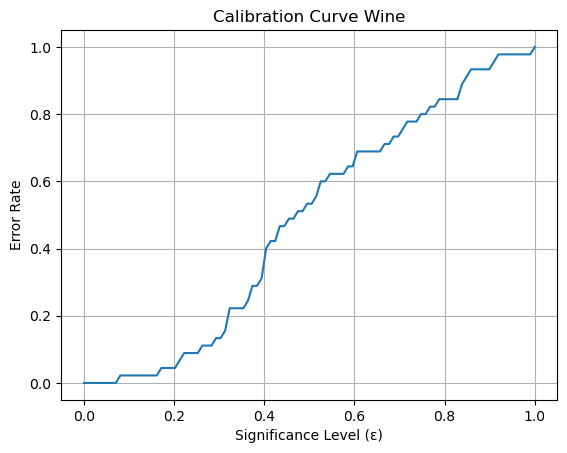

In [51]:
%matplotlib inline

# All p-Values from Wine
p_values = valsWine

# The labels from the test set of Wine
true_labels = wineY_test

n_test = len(p_values)

eps = np.linspace(0, 1, 100)  # a range of significance levels from 0 to 1
err = np.zeros(100)  # the corresponding error rates

for k, epsilon in enumerate(eps):

    err[k] = 0  # initializing the error rate 
    
    for j in range(n_test):

        # Ensure true_labels[j] is an integer index
        true_label_index = int(true_labels[j])
        
        # Access within the p_values list and check its less than the significance level
        if p_values[j][true_label_index] <= epsilon:
            err[k] += 1  # count this error

    err[k] /= n_test  # Calculate error rate

plt.plot(eps, err)
plt.xlabel('Significance Level (ε)')
plt.ylabel('Error Rate')
plt.title('Calibration Curve Wine')
plt.grid(True)
plt.show()


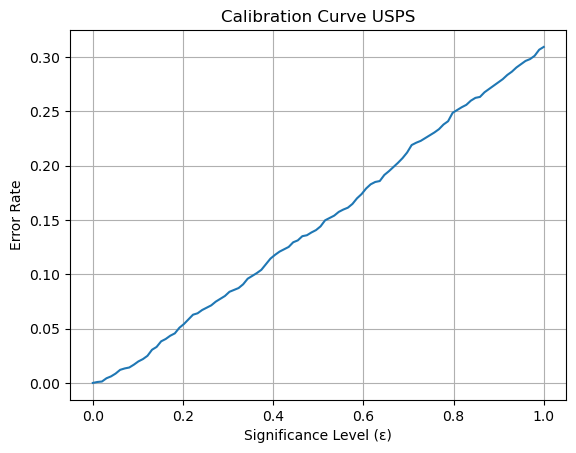

In [52]:
%matplotlib inline

# All p-Values from USPS
p_values = valsUSPS

# The labels from the test set of USPS
true_labels = uspsY_test

n_test = len(p_values)

eps = np.linspace(0, 1, 100)  # a range of significance levels from 0 to 1
err = np.zeros(100)  # the corresponding error rates

for k, epsilon in enumerate(eps):

    err[k] = 0  # initializing the error rate 
    
    for j in range(n_test):
        
        # Ensure true_labels[j] is an integer index
        true_label_index = int(true_labels[j])
        
        # Access within the p_values list and check its less than the significance level
        if p_values[j][true_label_index] <= epsilon:
            err[k] += 1  # count this error

    err[k] /= n_test  # Calculate error rate

plt.plot(eps, err)
plt.xlabel('Significance Level (ε)')
plt.ylabel('Error Rate')
plt.title('Calibration Curve USPS')
plt.grid(True)
plt.show()


    Using 10 Folds for KFold:

In [53]:
allRanksWine, conformityScoresWine = crossConformalPredictor(RobustScaler(),wineX_train, wineY_train, wineX_test,wineY_test, 1, 0.01,10)

valsWine = pValues(allRanksWine, wineX_train)
falsepWine , trueLabelPredWine, totalLabelsWine = falsePValues(valsWine, wineY_test)

print("Average False P:", falsepWine)
print("True Labels Predicted:", trueLabelPredWine)
print("Total Labels Predicted:", totalLabelsWine)
print("Error Percentage: ", (1-(trueLabelPredWine/totalLabelsWine))*100 )

Average False P: 0.01663902708678828
True Labels Predicted: 45
Total Labels Predicted: 45
Error Percentage:  0.0


In [54]:
allRanksUSPS, conformityScoresUSPS = crossConformalPredictor(Normalizer(),uspsX_train, uspsY_train, uspsX_test,uspsY_test, 10, 1,10)
valsUSPS = pValues(allRanksUSPS, uspsX_test)
falsepUSPS , trueLabelPredUSPS, totalLabelsUSPS = falsePValues(valsUSPS, uspsY_test)

print("Average False P:", falsepUSPS)
print("True Labels Predicted:", trueLabelPredUSPS)
print("Total Labels Predicted:", totalLabelsUSPS)
print("Error Percentage: ", (1-(trueLabelPredUSPS/totalLabelsUSPS))*100 )

Average False P: 0.01976900674007734
True Labels Predicted: 2278
Total Labels Predicted: 2325
Error Percentage:  2.0215053763440904


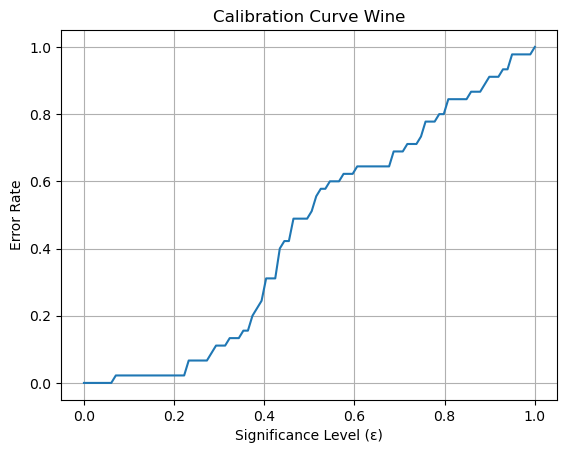

In [55]:
%matplotlib inline

# All p-Values from Wine
p_values = valsWine

# The labels from the test set of Wine
true_labels = wineY_test

n_test = len(p_values)

eps = np.linspace(0, 1, 100)  # a range of significance levels from 0 to 1
err = np.zeros(100)  # the corresponding error rates

for k, epsilon in enumerate(eps):

    err[k] = 0  # initializing the error rate 
    
    for j in range(n_test):

        # Ensure true_labels[j] is an integer index
        true_label_index = int(true_labels[j])
        
        # Access within the p_values list and check its less than the significance level
        if p_values[j][true_label_index] <= epsilon:
            err[k] += 1  # count this error

    err[k] /= n_test  # Calculate error rate

plt.plot(eps, err)
plt.xlabel('Significance Level (ε)')
plt.ylabel('Error Rate')
plt.title('Calibration Curve Wine')
plt.grid(True)
plt.show()


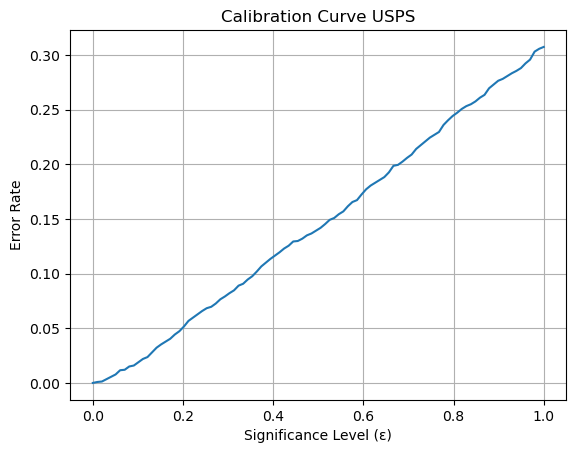

In [56]:
%matplotlib inline

# All p-Values from USPS
p_values = valsUSPS

# The labels from the test set of USPS
true_labels = uspsY_test

n_test = len(p_values)

eps = np.linspace(0, 1, 100)  # a range of significance levels from 0 to 1
err = np.zeros(100)  # the corresponding error rates

for k, epsilon in enumerate(eps):

    err[k] = 0  # initializing the error rate 
    
    for j in range(n_test):
        
        # Ensure true_labels[j] is an integer index
        true_label_index = int(true_labels[j])
        
        # Access within the p_values list and check its less than the significance level
        if p_values[j][true_label_index] <= epsilon:
            err[k] += 1  # count this error

    err[k] /= n_test  # Calculate error rate

plt.plot(eps, err)
plt.xlabel('Significance Level (ε)')
plt.ylabel('Error Rate')
plt.title('Calibration Curve USPS')
plt.grid(True)
plt.show()
